<a href="https://colab.research.google.com/github/JinghengYu21/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Data Loading and Cleaning

In [ ]:
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [ ]:
test_original = test.copy()
train_original = train.copy()

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Check Missing value





In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Mode Imputation for categorical variables

In [ ]:
from sklearn.impute import KNNImputer
#from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode

In [ ]:
categorical_col = [col for col in train.columns if train[col].dtypes == 'object']

In [ ]:
# Ensure that categorical_col contains valid column indices
for col in categorical_col:
    # Check if there are missing values in the current column
    if train[col].isnull().any():
        col_values = train[col]
        # Calculate mode value for non-missing values
        mode_value = mode(col_values[~col_values.isnull()])[0][0]
        # Impute missing values with mode_value
        train[col] = np.where(col_values.isnull(), mode_value, col_values)
    else:
        print(f"No missing values in column {col}")

No missing values in column Loan_ID
No missing values in column Education
No missing values in column Property_Area
No missing values in column Loan_Status


<ipython-input-113-f698b0051e9d>:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = mode(col_values[~col_values.isnull()])[0][0]
<ipython-input-113-f698b0051e9d>:7: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_value = mode(col_values[~col_values.isnull()])[0][0]


In [ ]:
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
cate_col = [col for col in test.columns if test[col].dtypes == 'object']
for col in cate_col:
    # Check if there are missing values in the current column
    if test[col].isnull().any():
        col_values = test[col]
        # Calculate mode value for non-missing values
        mode_value = mode(col_values[~col_values.isnull()])[0][0]
        # Impute missing values with mode_value
        test[col] = np.where(col_values.isnull(), mode_value, col_values)
    else:
        print(f"No missing values in column {col}")




No missing values in column Loan_ID
No missing values in column Married
No missing values in column Education
No missing values in column Property_Area


<ipython-input-115-8c6901b3f993>:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = mode(col_values[~col_values.isnull()])[0][0]
<ipython-input-115-8c6901b3f993>:7: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_value = mode(col_values[~col_values.isnull()])[0][0]


#### KNN Imputation for numeric variables

In [ ]:
# KNN imputation for numeric columns
numeric_col = [col for col in train.columns if train[col].dtypes != 'object']
train[numeric_col] = train[numeric_col].replace('', np.nan)
imputer = KNNImputer(n_neighbors=2)
train[numeric_col] = imputer.fit_transform(train[numeric_col])

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,141.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# KNN imputation for numeric columns
num_col = [col for col in test.columns if test[col].dtypes != 'object']
test[num_col] = test[num_col].replace('', np.nan)
imputer = KNNImputer(n_neighbors=2)
test[num_col] = imputer.fit_transform(test[num_col])

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## EDA

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,141.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Loan_Status', ylabel='count'>

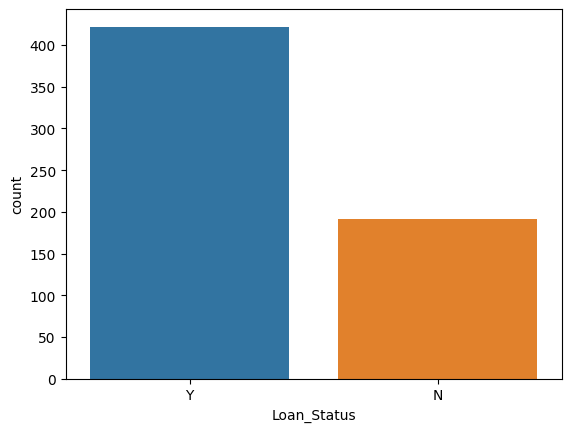

In [ ]:
# Look at the Target
sns.countplot(x='Loan_Status', data = train)
# The status of loan approvals is much higher than that of rejections.

In [ ]:
train_data = train.drop('Loan_ID',axis=1)

<Axes: xlabel='Credit_History', ylabel='count'>

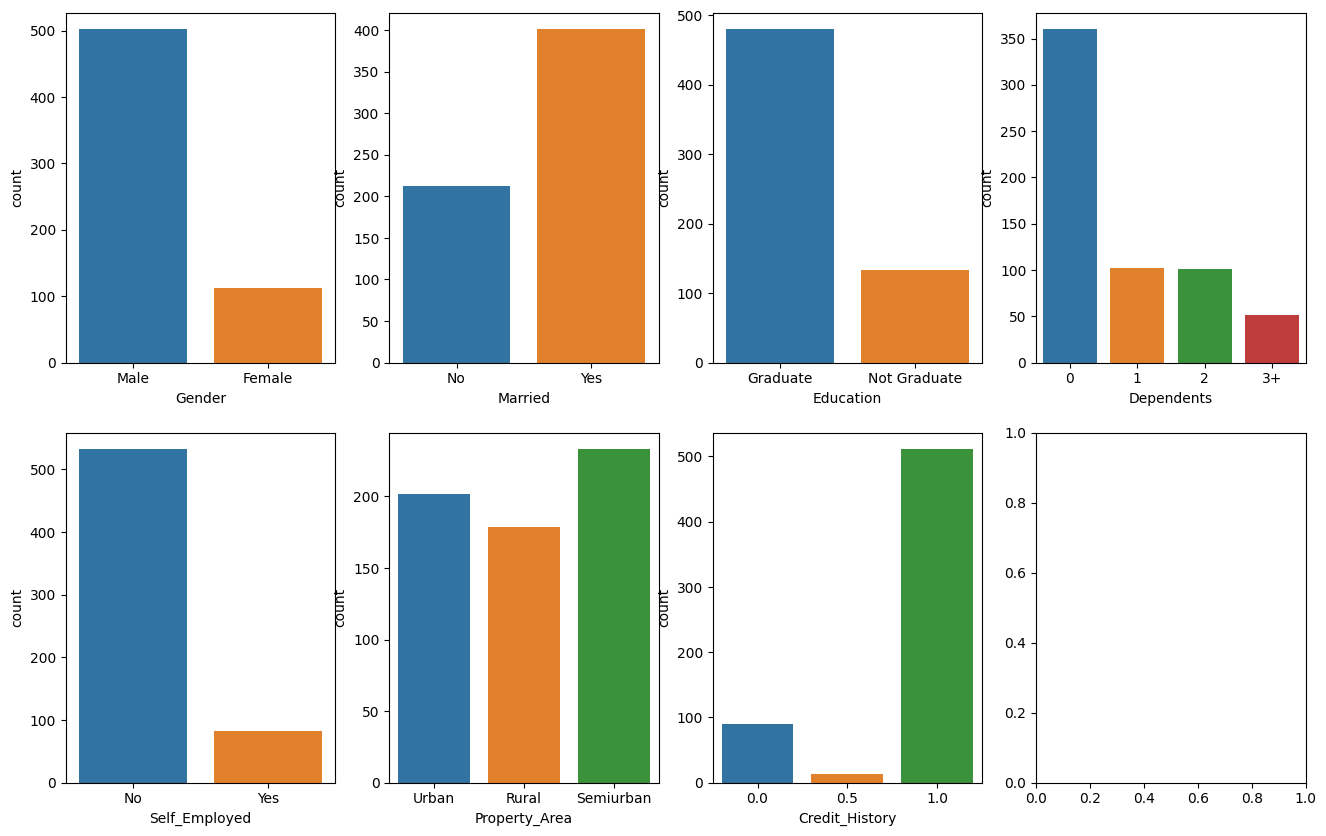

In [ ]:
# Look at categorical varibales
fig, ax = plt.subplots(2,4, figsize=(16,10))

sns.countplot(x='Gender', data=train_data, ax=ax[0][0])
sns.countplot(x='Married', data=train_data, ax=ax[0][1])
sns.countplot(x='Education', data=train_data, ax=ax[0][2])
sns.countplot(x='Dependents', data=train_data, ax=ax[0][3])
sns.countplot(x='Self_Employed', data=train_data, ax=ax[1][0])
sns.countplot(x='Property_Area', data=train_data, ax=ax[1][1])
sns.countplot(x='Credit_History', data=train_data, ax=ax[1][2])

- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

In [ ]:
# Graduation, gender, marital ststus and loan status- stacked plot


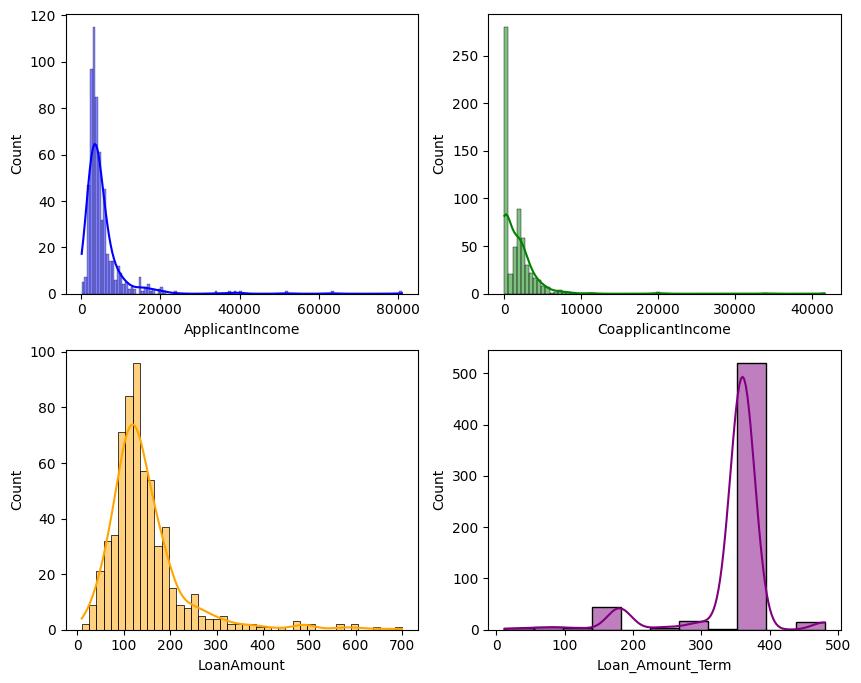

In [ ]:
# Histogram - Numeric varibales

fig, axs = plt.subplots(2,2, figsize=(10, 8))

sns.histplot(data=train_data, x="ApplicantIncome", kde=True, ax=axs[0,0], color='blue')
sns.histplot(data=train_data, x="CoapplicantIncome", kde=True, ax=axs[0,1], color='green')
sns.histplot(data=train_data, x="LoanAmount", kde=True, ax=axs[1,0], color='orange');
sns.histplot(data=train_data, x="Loan_Amount_Term", kde=True, ax=axs[1,1], color='purple');

In [ ]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,141.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


<Axes: ylabel='Loan_Amount_Term'>

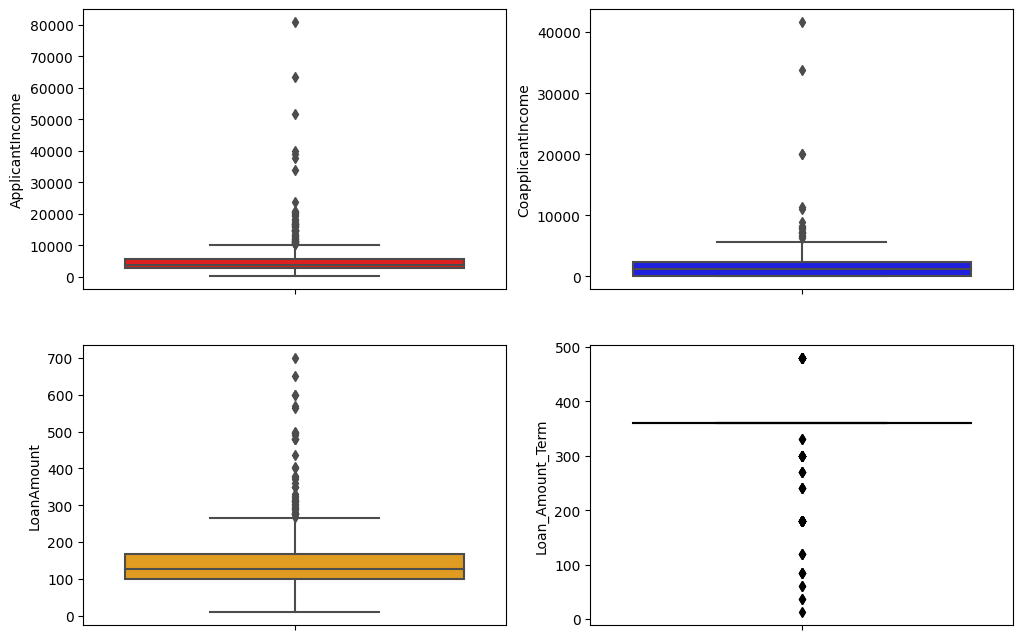

In [ ]:
# Box Plot
fig, axs = plt.subplots(2, 2, figsize=(12,8))

sns.boxplot(data=train_data, y="ApplicantIncome", ax=axs[0,0], color='red')
sns.boxplot(data=train_data, y="CoapplicantIncome", ax=axs[0,1], color='blue')
sns.boxplot(data=train_data, y="LoanAmount", ax=axs[1,0], color='orange');
sns.boxplot(data=train_data, y="Loan_Amount_Term", ax=axs[1,1], color='black')


The distribution of Applicant Income, Co.Applicant Income and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and violin plot).

The distribution of Loan Amount Term is negativly skewed and it has outliers.

In [ ]:
# Squre root transformation
train_data.ApplicantIncome = np.sqrt(train_data.ApplicantIncome)
train_data.CoapplicantIncome = np.sqrt(train_data.CoapplicantIncome)
train_data.LoanAmount = np.sqrt(train_data.LoanAmount)
train_data.Loan_Amount_Term = np .sqrt(train_data.Loan_Amount_Term)

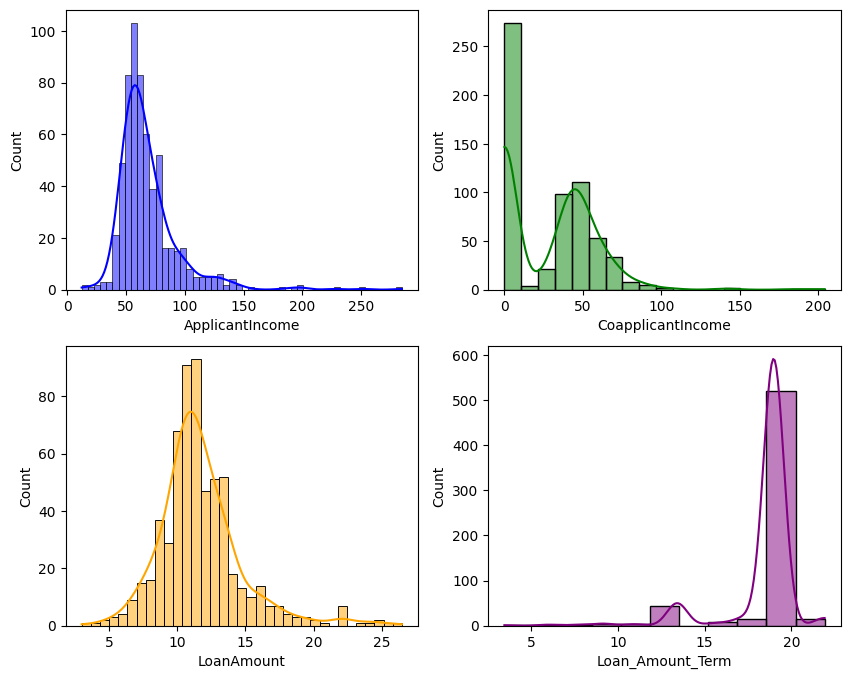

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=train_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='blue')
sns.histplot(data=train_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='green')
sns.histplot(data=train_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=train_data, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

## Feature Engineering

### One-hot Encoding

In [ ]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,76.478755,0.000000,11.874342,18.973666,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,18.973666,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,18.973666,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,18.973666,1.0,Urban,Y
4,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,18.973666,1.0,Urban,Y


In [ ]:
#X = train.drop(['Loan_Status','Loan_ID'],axis = 1)
#y = train['Loan_Status']
#test = test.drop('Loan_ID', axis =1)

In [ ]:
X = train_data.drop(['Loan_Status'],axis = 1)
y = train_data['Loan_Status']

In [ ]:
X = pd.get_dummies(X)
#train = pd.get_dummies(train)
#test = pd.get_dummies(test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
172,59.346440,0.000000,9.000000,13.416408,1.0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
224,79.056942,0.000000,11.313708,18.973666,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
181,43.772137,71.154761,8.185353,18.973666,1.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
144,108.429701,0.000000,13.674794,13.416408,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
103,68.205572,59.858166,13.910428,18.973666,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,44.721360,0.000000,8.717798,18.973666,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
595,61.911227,0.000000,10.488088,18.973666,1.0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0
560,60.621778,15.556349,10.392305,18.973666,1.0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0
507,59.858166,0.000000,9.797959,18.973666,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


## Model Selection

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
Tree_acc = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))
print(Tree_acc)
#random_state=1, max_depth=5, min_samples_split=2

              precision    recall  f1-score   support

           N       0.43      0.52      0.47        50
           Y       0.81      0.74      0.77       135

    accuracy                           0.68       185
   macro avg       0.62      0.63      0.62       185
weighted avg       0.70      0.68      0.69       185

0.6810810810810811


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=500)
rfmodel.fit(X_train, y_train)
rfpredictions = rfmodel.predict(X_test)
rf1_acc = accuracy_score(y_test, rfpredictions)
print(classification_report(y_test, rfpredictions))
print(rf1_acc)

              precision    recall  f1-score   support

           N       0.65      0.52      0.58        50
           Y       0.83      0.90      0.86       135

    accuracy                           0.79       185
   macro avg       0.74      0.71      0.72       185
weighted avg       0.78      0.79      0.79       185

0.7945945945945946


### Feature Importance

<Axes: >

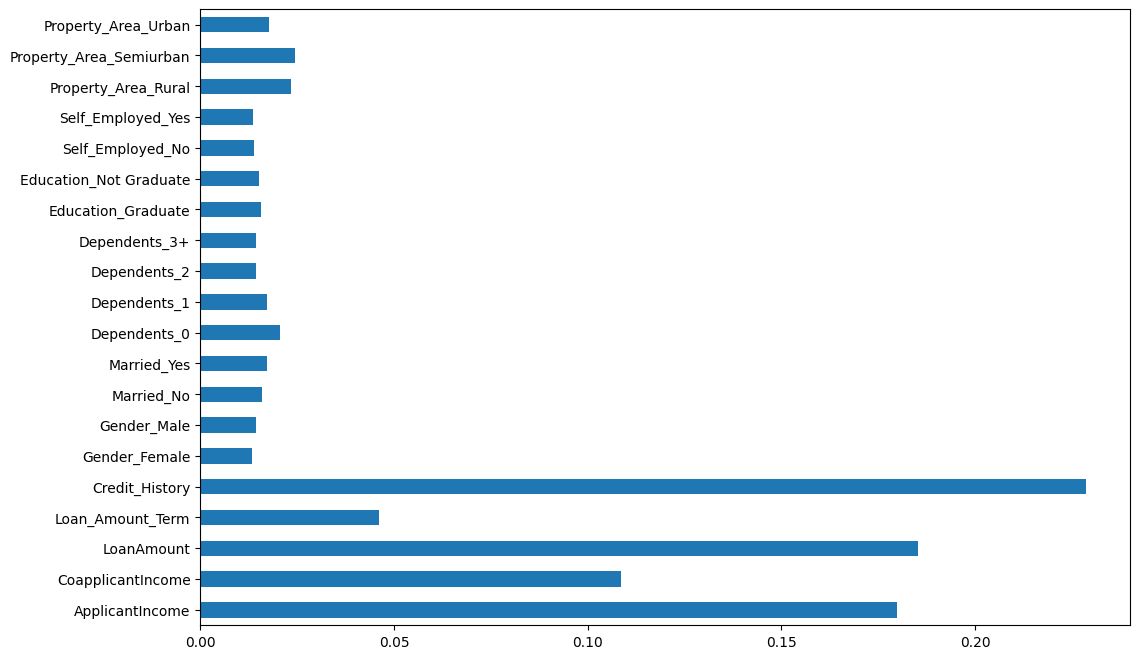

In [ ]:
# extract feature importances, convert into a Series
importances = pd.Series(rfmodel.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Applicant Income, Loan Amount,Coapplicant Income. So, feature engineering helped us in predicting our target variable.

GridSearchCV method

In [ ]:
# Define hyperparameters and values to search
rfmodel = RandomForestClassifier(random_state=1)
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt'], # Number of features to consider for best split
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfmodel, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=1)
best_model.fit(X_train, y_train)
prediction_best = best_model.predict(X_test)
rf_acc = accuracy_score(y_test, prediction_best)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print("GridSearchCv_Accuracy:", rf_acc)

GridSearchCv_Accuracy: 0.8378378378378378


The reason may cause same result: Random Forests have a random component due to the random selection of features and samples for each tree. Even with the same hyperparameters, the random initialization can lead to slightly different model behavior

### XGboost

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Y' as 1 and 'N' as 0 in your y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize XGBoost model
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1
)

# Fit the model on your training data (X_train, y_train_encoded)
model.fit(X_train, y_train_encoded)

# Make predictions on your test data (X_test)
predictions_encoded = model.predict(X_test)

# Inverse transform predictions to get 'Y' and 'N' back
predictions = label_encoder.inverse_transform(predictions_encoded)

# Calculate accuracy (replace y_test with your actual target values)
xbg1_accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", xbg1_accuracy)


Accuracy: 0.8


Top 10 most important features:
                    Feature  Importance
4            Credit_History    0.275233
11             Dependents_2    0.049243
8               Married_Yes    0.047823
14   Education_Not Graduate    0.047211
16        Self_Employed_Yes    0.043130
9              Dependents_0    0.042949
6               Gender_Male    0.042847
7                Married_No    0.042240
5             Gender_Female    0.041935
18  Property_Area_Semiurban    0.041285


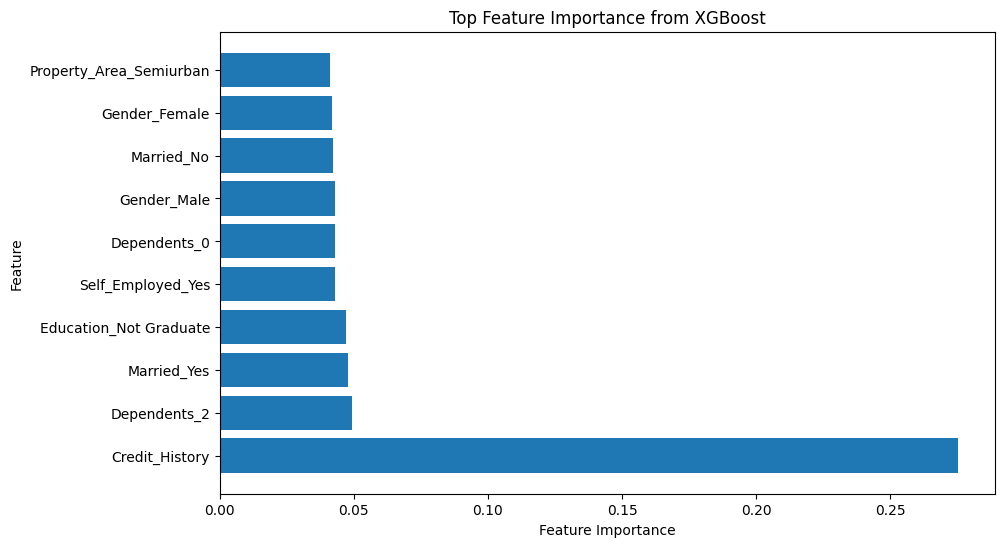

In [ ]:

importances = model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features
top_n = 10
print("Top", top_n, "most important features:")
print(feature_importance_df.head(top_n))

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importance from XGBoost')
plt.show()


Hyper-parameter turning

In [ ]:
# Define hyperparameters and values to search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs = -1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train_encoded)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
best_model_xgb = xgb.XGBClassifier(**best_params, random_state=1)
best_model_xgb.fit(X_train, y_train_encoded)
predictions_encoded = best_model_xgb.predict(X_test)
prediction_xgb = label_encoder.inverse_transform(predictions_encoded)
xgb_acc = accuracy_score(y_test, prediction_xgb)
print('Accuracy',xgb_acc)
print(classification_report(y_test, prediction_xgb))

Accuracy 0.8324324324324325
              precision    recall  f1-score   support

           N       0.83      0.48      0.61        50
           Y       0.83      0.96      0.89       135

    accuracy                           0.83       185
   macro avg       0.83      0.72      0.75       185
weighted avg       0.83      0.83      0.82       185



### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
SVCclassifier = SVC(kernel="linear",gamma ='auto', C = 6)
SVCclassifier.fit(X_train, y_train)
predictions = SVCclassifier.predict(X_test)
# Calculate accuracy (replace y_test with your actual target values)
svm_acc = accuracy_score(y_test, predictions)
print("Accuracy:",svm_acc)

Accuracy: 0.8486486486486486


In [ ]:
model = SVC()
# Define hyperparameters and values to search over
param_grid = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on your training data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on your test data (X_test)
predictions = best_model.predict(X_test)

# Calculate accuracy
SVM_acc_1 = accuracy_score(y_test, predictions)
print("Best Model Accuracy:", SVM_acc_1)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

# Fit the model on your training data (X_train, y_train)
model.fit(X_train, y_train)

# Make predictions on your test data (X_test)
predictions = model.predict(X_test)

# Calculate accuracy (replace y_test with your actual target values)
log_acc = accuracy_score(y_test, predictions)
print("Accuracy:", log_acc)

Accuracy: 0.827027027027027


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           N       0.89      0.44      0.59        57
           Y       0.80      0.98      0.88       128

    accuracy                           0.81       185
   macro avg       0.84      0.71      0.73       185
weighted avg       0.83      0.81      0.79       185



In [ ]:
model = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver algorithm
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on your training data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on your test data (X_test)
predictions = best_model.predict(X_test)

# Calculate accuracy
log_acc1 = accuracy_score(y_test, predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
print("Best Model Accuracy:", log_acc1)

Best Model Accuracy: 0.8540540540540541


The peformance of our model seems encouring, with accuarcy of 81%, precision of 79% and recall of 98%

In [ ]:
# Make prediction on test data
pred_test = model.predict(test)

In [ ]:
pred_test[:50]

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
      dtype=object)

In [ ]:
test1 = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [ ]:
logisticReg = pd.DataFrame(pred_test,columns=['Loan_Status'])

In [ ]:
logisticReg['Loan_ID'] = test1['Loan_ID']

In [ ]:
logisticReg

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051
...,...,...
362,Y,LP002971
363,Y,LP002975
364,Y,LP002980
365,Y,LP002986


In [ ]:
# convert to CSV file, without row index
logisticReg.to_csv('logistic.csv', index=False)

### LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.multiclass import OneVsRestClassifier
lgb_model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgb_model.fit(X_train, y_train)
predictions = lgb_model.predict(X_test)
lightGBM_acc = accuracy_score(y_test, predictions)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 287, number of negative: 142
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.668998 -> initscore=0.703655
[LightGBM] [Info] Start training from score 0.703655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
print("Accuracy:", lightGBM_acc)
print(classification_report(y_test, predictions))

Accuracy: 0.7945945945945946
              precision    recall  f1-score   support

           N       0.63      0.58      0.60        50
           Y       0.85      0.87      0.86       135

    accuracy                           0.79       185
   macro avg       0.74      0.73      0.73       185
weighted avg       0.79      0.79      0.79       185



### Cat Boost

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(
    iterations=100,   # Number of boosting iterations
    learning_rate=0.1, # Learning rate
    random_seed=1      # Seed for random number generation
    )

# Fit the model on your training data (X_train, y_train)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Calculate accuracy
cat_acc = accuracy_score(y_test, predictions)

0:	learn: 0.6501851	total: 2.02ms	remaining: 200ms
1:	learn: 0.6140224	total: 6.35ms	remaining: 311ms
2:	learn: 0.5887849	total: 8.42ms	remaining: 272ms
3:	learn: 0.5593527	total: 13.6ms	remaining: 326ms
4:	learn: 0.5442327	total: 16.9ms	remaining: 321ms
5:	learn: 0.5343200	total: 19.1ms	remaining: 299ms
6:	learn: 0.5181221	total: 29.7ms	remaining: 395ms
7:	learn: 0.4996472	total: 35.2ms	remaining: 405ms
8:	learn: 0.4860227	total: 40.4ms	remaining: 408ms
9:	learn: 0.4745486	total: 45.5ms	remaining: 409ms
10:	learn: 0.4657699	total: 50.5ms	remaining: 408ms
11:	learn: 0.4583219	total: 58.4ms	remaining: 428ms
12:	learn: 0.4510551	total: 61.4ms	remaining: 411ms
13:	learn: 0.4423516	total: 67.1ms	remaining: 412ms
14:	learn: 0.4335807	total: 71.7ms	remaining: 406ms
15:	learn: 0.4273964	total: 76.7ms	remaining: 402ms
16:	learn: 0.4220581	total: 81.2ms	remaining: 396ms
17:	learn: 0.4177806	total: 86.1ms	remaining: 392ms
18:	learn: 0.4064756	total: 90.9ms	remaining: 388ms
19:	learn: 0.3998546	t

In [ ]:
print("Accuracy:", cat_acc)

Accuracy: 0.8


In [ ]:
param_grid = {
    'iterations': [100, 200, 300],      # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [4, 6, 8],                 # Depth of trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on your training data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on your test data (X_test)
predictions = best_model.predict(X_test)

# Calculate accuracy
cat_acc_1 = accuracy_score(y_test, predictions)
print("Best Model Accuracy:", accuracy)


流式输出内容被截断，只能显示最后 5000 行内容。
1:	learn: 0.5200588	total: 5.71ms	remaining: 566ms
2:	learn: 0.4860842	total: 6.57ms	remaining: 431ms
3:	learn: 0.4666053	total: 7.66ms	remaining: 375ms
4:	learn: 0.4318307	total: 12.5ms	remaining: 486ms
5:	learn: 0.4011946	total: 17.1ms	remaining: 554ms
6:	learn: 0.3754295	total: 21.5ms	remaining: 594ms
7:	learn: 0.3548749	total: 24.2ms	remaining: 580ms
8:	learn: 0.3363242	total: 32.3ms	remaining: 686ms
9:	learn: 0.3306545	total: 39.3ms	remaining: 746ms
10:	learn: 0.3241972	total: 41.9ms	remaining: 720ms
11:	learn: 0.3109669	total: 48.7ms	remaining: 763ms
12:	learn: 0.3102588	total: 49.4ms	remaining: 710ms
13:	learn: 0.3023474	total: 54.3ms	remaining: 722ms
14:	learn: 0.2879404	total: 58.5ms	remaining: 721ms
15:	learn: 0.2834189	total: 62.5ms	remaining: 719ms
16:	learn: 0.2702500	total: 66.8ms	remaining: 719ms
17:	learn: 0.2700391	total: 67.8ms	remaining: 686ms
18:	learn: 0.2694943	total: 68.8ms	remaining: 655ms
19:	learn: 0.2609940	total: 73.4ms	remaining: 

In [ ]:
print("Best Model Accuracy:", cat_acc_1)
print(classification_report(y_test,predictions))

Best Model Accuracy: 0.8054054054054054
              precision    recall  f1-score   support

           N       0.93      0.42      0.58        59
           Y       0.78      0.98      0.87       126

    accuracy                           0.81       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.83      0.81      0.78       185



## Model Comparison

In [ ]:
# Model Comparison before Hyperparameter-tunning
compare_model = pd.DataFrame({'Model': ['Logistic Regression',"Support Vector Machine", "Decision Tree",
                             "Random Forest", " Cat Boost", 'LightGBM','XGBoost'],
                  'Accuracy_Score': [log_acc*100, svm_acc*100,Tree_acc*100,rf1_acc*100,cat_acc*100,lightGBM_acc*100,xbg1_accuracy*100]})


compare_model.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score
1,Support Vector Machine,84.864865
0,Logistic Regression,82.702703
3,Random Forest,80.540541
4,Cat Boost,80.000000
6,XGBoost,80.000000
5,LightGBM,79.459459
2,Decision Tree,68.108108


In [ ]:
# gridsearchCV - Logistic Regression, Cat Boost, SVM, LightGBM, XGBoost

Gridsearch CV

In [ ]:
compare_model = pd.DataFrame({'Model': ['Random Forest','XGBoost','Logistic Regression'],
                  'Accuracy_Score': [rf_acc,xgb_acc,log_acc1]})
compare_model.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score
2,Logistic Regression,0.854054
0,Random Forest,0.837838
1,XGBoost,0.832432
